In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import feature_engine

ModuleNotFoundError: No module named 'feature_engine'

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from feature_engine.encoding import OneHotEncoder
# from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [ ]:
#Import svm model
from sklearn import svm
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

#custom score for f1_weighted to cv with
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
# import nxneo4j as nx
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from yellowbrick.text import UMAPVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer
from py2neo import Graph, Node, Relationship

from nltk.corpus import stopwords
from neo4j import GraphDatabase

from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, f_classif


from sklearn.linear_model import RidgeClassifierCV

from sklearn.neural_network import MLPClassifier


from imblearn.over_sampling import ADASYN

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


from imblearn.over_sampling import SMOTE

import time 

In [2]:
sns.set_style("dark")
sns.set_context("poster")

In [3]:
sns.color_palette("husl", 9)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

In [6]:
# Use /t as the separator between columns
df = pd.read_csv('F:/Study/大三下/大数据处理技术/Project/arms-trade-analysis-master/Group 7-Big Data Processing Technology-Course Project/Group 7-Big Data Processing Technology-Course Project/code/Trade-Register-1950-2019-suppliers copy.txt',delimiter= "\t", index_col=False)

df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,No.,...,No.,,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.rename(columns={'Unnamed: 0': 'RecipientSupplier'})
df.columns

Index(['RecipientSupplier', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', ' ',
       'Year(s)', 'Unnamed: 6', '
Supplier/', 'Unnamed: 8', 'No.', 'Weapon',
       'Weapon.1', 'Year', 'of', 'No. ', '
', 'recipient (R)', 'ordered',
       'designation', 'description', 'of order', 'delivery', 'delivered',
       'Comments'],
      dtype='object')

In [8]:
# Finds the row that contains "R:"
recipient_ind = df[df['RecipientSupplier'].str.find("R:") != -1]

recipient_ind

,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,No.,...,No.,,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26979,R: Iraq,(75),D-30 122mm,Towed gun,(1988),1989-1990,(75),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27029,R: Liberia,1,DHC-4 Caribou,Transport aircraft,1989,1990,1,Second-hand (modernized in Malta before delivery),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Extract the 'RecipientSupplier' column from the row containing "R:" and remove missing values from it
recipient_ind = recipient_ind['RecipientSupplier'].dropna()

recipient_ind

3        R: Burkina Faso
6              R: Angola
11              R: Congo
18            R: Bolivia
46              R: Sudan
              ...       
26962         R: Bolivia
26974        R: Cambodia
26979            R: Iraq
27029         R: Liberia
27032         R: Czechia
Name: RecipientSupplier, Length: 136, dtype: object

In [10]:
# Create an index list of recipients and vendors
recip_ind_list = list(recipient_ind.keys())

supplier_ind_list = [r - 1 for r in recip_ind_list]

supplier_ind_list

[2,
 5,
 10,
 17,
 45,
 48,
 51,
 182,
 287,
 290,
 293,
 296,
 400,
 500,
 505,
 652,
 656,
 751,
 756,
 1286,
 1290,
 1312,
 2221,
 2227,
 2230,
 2234,
 2238,
 2244,
 2247,
 2359,
 2471,
 2549,
 2552,
 2556,
 2574,
 2578,
 2656,
 2661,
 2665,
 2671,
 2674,
 2678,
 2681,
 2762,
 2765,
 5187,
 5190,
 5197,
 6404,
 6408,
 6424,
 6427,
 6430,
 6450,
 6454,
 6532,
 6554,
 6597,
 6614,
 6625,
 7280,
 8209,
 8249,
 8294,
 8312,
 8316,
 8324,
 8333,
 8336,
 8341,
 8403,
 8408,
 8412,
 8415,
 8418,
 8427,
 8431,
 8435,
 8452,
 8461,
 8466,
 8469,
 8472,
 8475,
 9031,
 9059,
 9077,
 9080,
 9083,
 9131,
 9134,
 9270,
 9277,
 9303,
 9307,
 9314,
 9318,
 9429,
 9479,
 9489,
 9532,
 10673,
 10692,
 10695,
 10721,
 10725,
 10771,
 10818,
 10821,
 11047,
 11144,
 11147,
 11152,
 14512,
 14767,
 14770,
 14775,
 15194,
 15504,
 15525,
 15545,
 15550,
 15659,
 15731,
 15735,
 16145,
 18059,
 18062,
 26729,
 26951,
 26955,
 26961,
 26973,
 26978,
 27028,
 27031]

In [11]:
df.head(10)

,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,No.,...,No.,,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Insert a new column -- Supplier
df.insert(0,'Supplier','')
df

,Supplier,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,...,No.,,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27030,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27031,,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27032,,R: Czechia,10,2S1 122mm,Self-propelled gun,(2000),2001,10,Second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27033,,Zambia,(28),Ferret,APV,1964,1964,(28),Ex-Rhodesian; taken over as aid on independence,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.loc[supplier_ind_list]

,Supplier,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,...,No.,,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
2,,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26961,,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26973,,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26978,,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27028,,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.loc[recip_ind_list]

,Supplier,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,...,No.,,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
3,,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,,R: Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,,R: Bolivia,(37),M-3/M-5 Half-track,APC,2006,2006,(37),Second-hand; aid; M-5 and M-9 versions,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,,R: Sudan,1,An-32,Transport aircraft,(2005),2006,1,Second-hand; probably; ordered via Ukraine; mo...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,,R: Bolivia,9,F-86F Sabre,Fighter aircraft,(1973),1975,9,Second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26974,,R: Cambodia,2,Project-206/Shershen,Patrol craft,(2005),2006,2,Second-hand; aid,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26979,,R: Iraq,(75),D-30 122mm,Towed gun,(1988),1989-1990,(75),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27029,,R: Liberia,1,DHC-4 Caribou,Transport aircraft,1989,1990,1,Second-hand (modernized in Malta before delivery),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
shift_df = df.loc[supplier_ind_list, ["Supplier", "RecipientSupplier"]].shift(-1, axis=1, fill_value=" ")

shift_df

,Supplier,RecipientSupplier
2,Albania,
5,Algeria,
10,Angola,
17,Argentina,
45,Armenia,
...,...,...
26961,Venezuela,
26973,Viet Nam,
26978,Yugoslavia,
27028,Zambia,


In [18]:
df['Supplier'] = shift_df['Supplier']

df.head(10)

,Supplier,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,...,No.,,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.insert(1,'Recipient','')

df

,Supplier,Recipient,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,...,No.,,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27030,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27031,Zimbabwe,,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27032,NaN,,R: Czechia,10,2S1 122mm,Self-propelled gun,(2000),2001,10,Second-hand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27033,NaN,,Zambia,(28),Ferret,APV,1964,1964,(28),Ex-Rhodesian; taken over as aid on independence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
all_recip_list = df.loc[~df.index.isin(supplier_ind_list)]

recip_shift_df = df.loc[all_recip_list.index, ["Recipient", "RecipientSupplier"]].shift(-1, axis=1, fill_value=" ")

recip_shift_df.head(10)

,Recipient,RecipientSupplier
0,NaN,
1,NaN,
3,R: Burkina Faso,
4,NaN,
6,R: Angola,
7,Nigeria,
8,Western Sahara,
9,NaN,
11,R: Congo,
12,Cote d'Ivoire,


In [21]:
df['Recipient'] = recip_shift_df['Recipient']

df.head(10)

,Supplier,Recipient,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,...,No.,,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,R: Burkina Faso,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,R: Angola,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Nigeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Western Sahara,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27035 entries, 0 to 27034
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Supplier           136 non-null    object 
 1   Recipient          26762 non-null  object 
 2   RecipientSupplier  26898 non-null  object 
 3   Unnamed: 1         3317 non-null   object 
 4   Unnamed: 2         26649 non-null  object 
 5   Unnamed: 3         26762 non-null  object 
 6                      26762 non-null  object 
 7   Year(s)            26685 non-null  object 
 8   Unnamed: 6         25998 non-null  object 
 9    Supplier/         25540 non-null  object 
 10  Unnamed: 8         18901 non-null  object 
 11  No.                0 non-null      float64
 12  Weapon             0 non-null      float64
 13  Weapon.1           0 non-null      float64
 14  Year               0 non-null      float64
 15  of                 0 non-null      float64
 16  No.                0 n

In [23]:
df1 = df.iloc[:,:-15]

df1

,Supplier,Recipient,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,R: Burkina Faso,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27031,Zimbabwe,NaN,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27032,NaN,R: Czechia,R: Czechia,10,2S1 122mm,Self-propelled gun,(2000),2001,10,Second-hand,NaN
27033,NaN,Zambia,Zambia,(28),Ferret,APV,1964,1964,(28),Ex-Rhodesian; taken over as aid on independence,NaN


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27035 entries, 0 to 27034
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           136 non-null    object
 1   Recipient          26762 non-null  object
 2   RecipientSupplier  26898 non-null  object
 3   Unnamed: 1         3317 non-null   object
 4   Unnamed: 2         26649 non-null  object
 5   Unnamed: 3         26762 non-null  object
 6                      26762 non-null  object
 7   Year(s)            26685 non-null  object
 8   Unnamed: 6         25998 non-null  object
 9    Supplier/         25540 non-null  object
 10  Unnamed: 8         18901 non-null  object
dtypes: object(11)
memory usage: 2.3+ MB


In [25]:
df1 = df1.drop('RecipientSupplier',axis=1)

df1.head(10)

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df1['Recipient'] = df1['Recipient'].str.replace(r'R:', '')

df1.head(10)

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
blank_recipient_list = df1['Recipient'] == '     '

blank_recipient_list

0        False
1        False
2        False
3        False
4        False
         ...  
27030    False
27031    False
27032    False
27033    False
27034     True
Name: Recipient, Length: 27035, dtype: bool

In [28]:
df1.loc[blank_recipient_list] = df1.loc[blank_recipient_list]

df1.loc[blank_recipient_list]

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
13,NaN,,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels
21,NaN,,NaN,3,Gem,Turboshaft,1988,1988,3,Second-hand; spares for Lynx helicopters
25,NaN,,NaN,3,Bouchard,OPV,1964,1964-1968,3,Second-hand
26,NaN,,NaN,1,G-21 Goose,Light transport ac,(1966),1967,1,Second-hand; aid
27,NaN,,NaN,1,DHC-3 Otter,Light transport ac,(1970),1972,1,Second-hand; aid
...,...,...,...,...,...,...,...,...,...,...
27022,NaN,,NaN,1,PN-13,Tanker,1969,1969,1,Second-hand but modernized before delivery; Su...
27023,NaN,,NaN,5,DTM-211,Landing craft,(1990),1991,5,Designation uncertain
27025,NaN,,NaN,2,G-2A Galeb,Trainer aircraft,1970,1971,2,G-2AE version
27026,NaN,,NaN,4,J-1 Jastreb,Ground attack ac,1970,1971,4,J-1E version; possibly incl 2 RJ-1E reconnaiss...


In [29]:
df1.loc[blank_recipient_list] = df1.loc[blank_recipient_list].shift(-1, axis=1, fill_value=" ")

blank_recipient_list

0        False
1        False
2        False
3        False
4        False
         ...  
27030    False
27031    False
27032    False
27033    False
27034     True
Name: Recipient, Length: 27035, dtype: bool

In [30]:
df1.loc[blank_recipient_list]

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
13,,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels,
21,,NaN,3,Gem,Turboshaft,1988,1988,3,Second-hand; spares for Lynx helicopters,
25,,NaN,3,Bouchard,OPV,1964,1964-1968,3,Second-hand,
26,,NaN,1,G-21 Goose,Light transport ac,(1966),1967,1,Second-hand; aid,
27,,NaN,1,DHC-3 Otter,Light transport ac,(1970),1972,1,Second-hand; aid,
...,...,...,...,...,...,...,...,...,...,...
27022,,NaN,1,PN-13,Tanker,1969,1969,1,Second-hand but modernized before delivery; Su...,
27023,,NaN,5,DTM-211,Landing craft,(1990),1991,5,Designation uncertain,
27025,,NaN,2,G-2A Galeb,Trainer aircraft,1970,1971,2,G-2AE version,
27026,,NaN,4,J-1 Jastreb,Ground attack ac,1970,1971,4,J-1E version; possibly incl 2 RJ-1E reconnaiss...,


In [31]:
df1.head(10)

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df1.columns

Index(['Supplier', 'Recipient', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', ' ',
       'Year(s)', 'Unnamed: 6', '
Supplier/', 'Unnamed: 8'],
      dtype='object')

In [33]:
df1 = df1.rename(columns=lambda x: x.strip())

In [34]:
df1.columns

Index(['Supplier', 'Recipient', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', '',
       'Year(s)', 'Unnamed: 6', 'Supplier/', 'Unnamed: 8'],
      dtype='object')

In [35]:
df1 = df1.rename(columns={'Unnamed: 1': 'NOrdered','Unnamed: 2': 'NoDesignation', 'Unnamed: 3': 'WeaponDescription','':'OrderYear','Year(s)':'DeliveryYear','Unnamed: 6':'NDelivered','Supplier/':'Comments' })

df1.head(20)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27035 entries, 0 to 27034
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           23563 non-null  object
 1   Recipient          3335 non-null   object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26762 non-null  object
 4   WeaponDescription  26762 non-null  object
 5   OrderYear          26762 non-null  object
 6   DeliveryYear       25998 non-null  object
 7   NDelivered         25998 non-null  object
 8   Comments           21701 non-null  object
 9   Unnamed: 8         23427 non-null  object
dtypes: object(10)
memory usage: 2.1+ MB


In [37]:
df1['Unnamed: 8'].value_counts()

Unnamed: 8
    23427
Name: count, dtype: int64

In [38]:
df1 = df1.drop('Unnamed: 8',axis=1)

df1.head(10)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df1 = df1.dropna(how='all')

df1.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand


In [40]:
df1.head(30)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
10,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,NaN,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels


In [41]:
df1 = df1.replace(r'^\s*$', np.nan, regex=True)

df1.head(20)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
10,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,NaN,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,NaN,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels


In [42]:
df1['Supplier']= df1[['Supplier']].ffill()

df1.head(20)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
10,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,Angola,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,Angola,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels


In [43]:
df1.head(30)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
10,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,Angola,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,Angola,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels


In [44]:
df1.Supplier.value_counts()

Supplier
United States          8666
Soviet Union           3359
France                 2421
United Kingdom         1913
Germany                1206
                       ... 
FMLN (El Salvador)*       2
Slovenia                  2
(multiple sellers)        2
South Vietnam             2
Albania                   2
Name: count, Length: 136, dtype: int64

In [45]:
first_occur_ind = df1.loc[(~df1.Supplier.duplicated())].index
first_occur_ind

Index([    2,     5,    10,    17,    45,    48,    51,   182,   287,   290,
       ...
       18059, 18062, 26729, 26951, 26955, 26961, 26973, 26978, 27028, 27031],
      dtype='int64', length=136)

In [46]:
df2 = df1[~df1.index.isin(first_occur_ind)]

df2.head(30)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,Angola,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,Angola,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels
14,Angola,Guinea-Bissau,1,Do-27,Light aircraft,1980,1980,1,Second-hand; status uncertain
15,Angola,United States,250,FIM-92 Stinger,Portable SAM,1992,1992,250,Second-hand; delivered in 1980s as aid to UNIT...
18,Argentina,Bolivia,(37),M-3/M-5 Half-track,APC,2006,2006,(37),Second-hand; aid; M-5 and M-9 versions


In [47]:
# save the cleaned df2
df2.to_csv('d2_start.csv', index=False)

In [48]:
df2.DeliveryYear.value_counts(dropna=False)

DeliveryYear
NaN          764
2019         337
2016         303
1981         300
1975         285
            ... 
2000-2016      1
2009-2018      1
1996-2019      1
1992-2010      1
1999-2012      1
Name: count, Length: 879, dtype: int64

In [49]:
df2[df2.DeliveryYear.isna()][:31]

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
66,Australia,Chile,2,Perry,Frigate,2019,NaN,NaN,Second-hand
68,Australia,NaN,2,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
97,Australia,NaN,1,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
106,Australia,NaN,1,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
109,Australia,NaN,2,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
124,Australia,NaN,1,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
129,Australia,NaN,1,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
158,Australia,Timor-Leste,2,Guardian,Patrol craft,(2017),NaN,NaN,Aid; delivery planned 2023
163,Australia,NaN,2,Cape,Patrol craft,2019,NaN,NaN,AUD126 m ($85 m) deal; for coast guard; delive...
166,Australia,UAE,NaN,R-400S,IFV turret,2019,NaN,NaN,AED1.6 b ($316 m) deal; probably incl for Nimr...


NaN in DeliveryYear and NDelivered represent pending deals per SIPRI

In [50]:
len(df2[df2.DeliveryYear.isna()])

764

In [51]:
len(df2[df2.NDelivered.isna()])

764

In [52]:
df2.fillna({'DeliveryYear':'Pending', 'NDelivered':'Pending'}, inplace=True)

len(df2[df2.DeliveryYear.isna()])

C:\Users\86136\AppData\Local\Temp\ipykernel_17848\581621511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna({'DeliveryYear':'Pending', 'NDelivered':'Pending'}, inplace=True)


0

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26762 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26762 non-null  object
 1   Recipient          3335 non-null   object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26762 non-null  object
 4   WeaponDescription  26762 non-null  object
 5   OrderYear          26762 non-null  object
 6   DeliveryYear       26762 non-null  object
 7   NDelivered         26762 non-null  object
 8   Comments           21701 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [54]:
len(df2[df2.NOrdered.isna()])

131

In [55]:
df2[df2.NOrdered.isna()]

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
166,Australia,UAE,NaN,R-400S,IFV turret,2019,Pending,Pending,AED1.6 b ($316 m) deal; probably incl for Nimr...
443,Belgium,NaN,NaN,Cockerill-3105 105mm,Tank turret,2016,2017,(1),For Pandur-2 FSV from Austria
2114,China,NaN,NaN,C-708UNA,Anti-ship missile,2017,Pending,Pending,For S26T submarines
2120,China,NaN,NaN,Yu-8 533mm,AS/ASW torpedo,2017,Pending,Pending,For S26T submarine; designation uncertain (rep...
2149,China,NaN,NaN,SR-5,Self-propelled MRL,(2018),Pending,Pending,NaN
...,...,...,...,...,...,...,...,...,...
25291,United States,NaN,NaN,MIM-104F PAC-3,ABM,(2018),Pending,Pending,Swedish designation Rb-103b
26243,United States,NaN,NaN,FGM-148 Javelin,Anti-tank missile,2018,Pending,Pending,NaN
26345,United States,NaN,NaN,Patriot PAC-3,SAM/ABM system,2018,Pending,Pending,$1.6 b deal
26349,United States,NaN,NaN,RIM-162 ESSM Block-2,SAM,(2019),Pending,Pending,For Gowind-2500 frigates


In [56]:
df2 = df2[df2['NOrdered'].notna()]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26631 non-null  object
 1   Recipient          3317 non-null   object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26631 non-null  object
 4   WeaponDescription  26631 non-null  object
 5   OrderYear          26631 non-null  object
 6   DeliveryYear       26631 non-null  object
 7   NDelivered         26631 non-null  object
 8   Comments           21596 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


Lack of comments replaced with "None"

In [57]:
df2['Comments'] = df2["Comments"].fillna("None")

Forward filling recipients and not just suppliers

In [58]:
df2['Recipient'] = df2['Recipient'].ffill()

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26631 non-null  object
 1   Recipient          26631 non-null  object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26631 non-null  object
 4   WeaponDescription  26631 non-null  object
 5   OrderYear          26631 non-null  object
 6   DeliveryYear       26631 non-null  object
 7   NDelivered         26631 non-null  object
 8   Comments           26631 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [59]:
#removing parenthesis from OrderYear
df2['OrderYear'] =  df2['OrderYear'].apply(lambda x: x.replace('(','').replace(')','')) 

df2.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,2016,2016,(3),Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


Removing ( and ) from no. Ordered and Delivered

In [60]:
df2['NOrdered'] =  df2['NOrdered'].apply(lambda x: x.replace('(','').replace(')','')) 

df2.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,(3),Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


In [61]:
df2['NDelivered'] =  df2['NDelivered'].apply(lambda x: x.replace('(','').replace(')','')) 

df2.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


In [62]:
final_df = df2.copy()

final_df

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
...,...,...,...,...,...,...,...,...,...
27026,Yugoslavia,Zambia,4,J-1 Jastreb,Ground attack ac,1970,1971,4,J-1E version; possibly incl 2 RJ-1E reconnaiss...
27029,Zambia,Liberia,1,DHC-4 Caribou,Transport aircraft,1989,1990,1,Second-hand (modernized in Malta before delivery)
27032,Zimbabwe,Czechia,10,2S1 122mm,Self-propelled gun,2000,2001,10,Second-hand
27033,Zimbabwe,Zambia,28,Ferret,APV,1964,1964,28,Ex-Rhodesian; taken over as aid on independence


In [63]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26631 non-null  object
 1   Recipient          26631 non-null  object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26631 non-null  object
 4   WeaponDescription  26631 non-null  object
 5   OrderYear          26631 non-null  object
 6   DeliveryYear       26631 non-null  object
 7   NDelivered         26631 non-null  object
 8   Comments           26631 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


Beginning work on an OrderYear time series

In [64]:
time_df = final_df.copy()

time_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


In [65]:
#making datetime index
time_df['OrderYear'] = pd.to_datetime(time_df['OrderYear'])
time_df = time_df.set_index('OrderYear').sort_index()
time_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,DeliveryYear,NDelivered,Comments
OrderYear,,,,,,,,
1940-01-01,United States,Brazil,16,Mk-30 127mm,Naval gun,1951,16,For 4 Acre destroyers from UK
1940-01-01,United Kingdom,Brazil,4,Acre,Destroyer,1951,4,Produced in Brazil
1943-01-01,Sweden,Switzerland,234,M/40 105mm,Towed gun,1950-1953,234,Swiss designation 10.5cm Hb-46; more delivered...
1945-01-01,United Kingdom,Australia,29,Lincoln,Bomber aircraft,1950-1953,29,Lincoln B-30 version
1945-01-01,France,Spain,18,Steam turbine,Steam engine,1953-1965,18,For 9 Audaz destroyers or frigates produced in...


Plotting: big difference in Suppliers vs. Recipients

C:\Users\86136\AppData\Local\Temp\ipykernel_17848\374624363.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Supplier", data=top_suppliers, palette="Pastel1")
C:\Users\86136\AppData\Roaming\Python\Python39\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\86136\AppData\Roaming\Python\Python39\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\86136\App

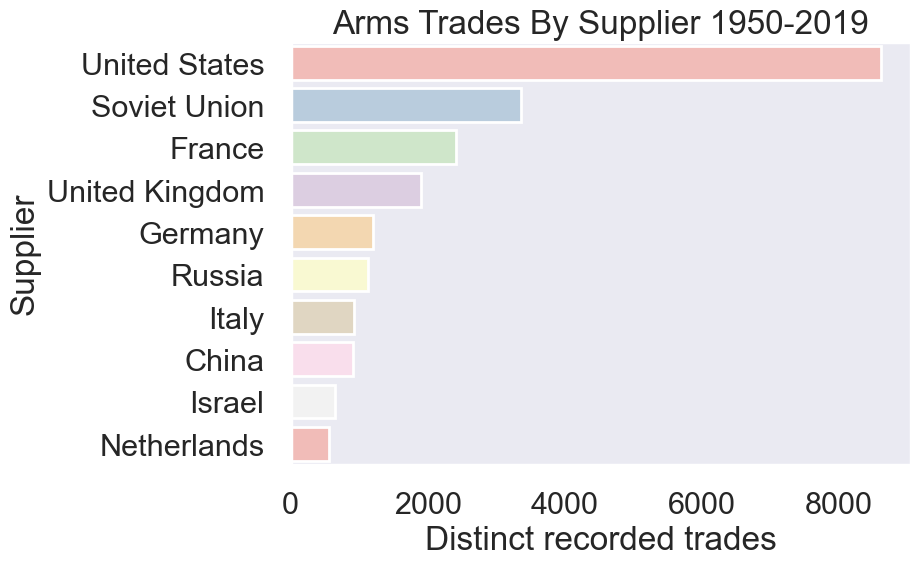

In [67]:
'''sns.countplot(y="Supplier", saturation=2, data=time_df, palette="Pastel1",
              order=time_df['Supplier'].value_counts().iloc[:10].index)
fig = plt.gcf()
ax = plt.gca()
ax.set_title("Arms Trades By Supplier 1950-2019")
ax.set_xlabel("Distinct recorded trades")
fig.savefig('C:/Users/86136/Desktop/arms-trade-analysis-master/images/top_10_suppliers.png',bbox_inches='tight')'''

# Use the groupby and count functions to count the number of transactions for each vendor
supplier_counts = time_df.groupby("Supplier").size().reset_index(name="Count")

# Sort suppliers in descending order by number of transactions
top_suppliers = supplier_counts.sort_values(by="Count", ascending=False).head(10)

sns.barplot(x="Count", y="Supplier", data=top_suppliers, palette="Pastel1")

plt.title("Arms Trades By Supplier 1950-2019")
plt.xlabel("Distinct recorded trades")
plt.ylabel("Supplier")

plt.savefig('C:/Users/86136/Desktop/code-Group7/NLP_Model/images/top_10_suppliers.png', bbox_inches='tight')
plt.show()

C:\Users\86136\AppData\Local\Temp\ipykernel_17848\2048445197.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_recipients.values, y=top_recipients.index, saturation=2, palette="Pastel1")
C:\Users\86136\AppData\Roaming\Python\Python39\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\86136\AppData\Roaming\Python\Python39\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)

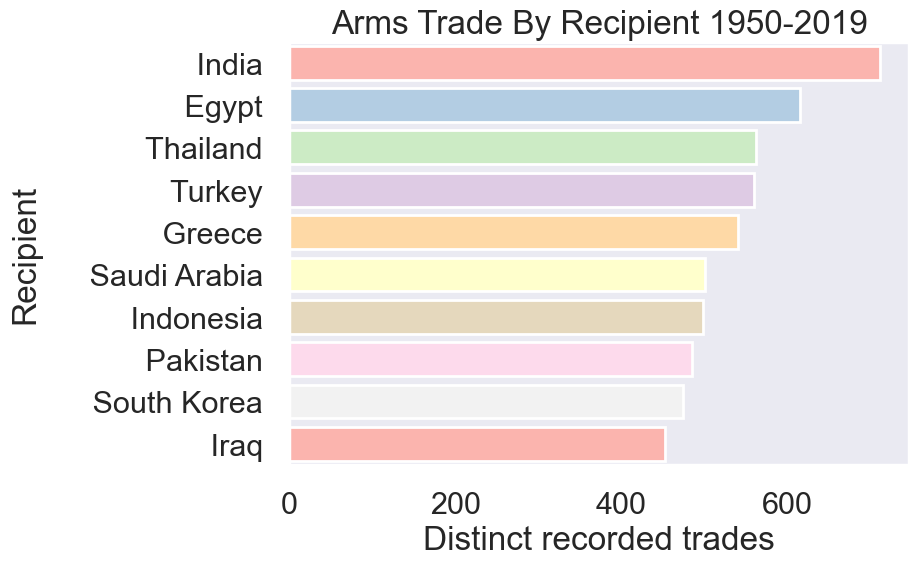

In [69]:
'''sns.countplot(y="Recipient", saturation=2, data=time_df, palette="Pastel1",
              order=time_df['Recipient'].value_counts().iloc[:10].index)

fig = plt.gcf()
ax = plt.gca()
ax.set_title("Arms Trade By Recipient 1950-2019")
ax.set_xlabel("Distinct recorded trades")
fig.savefig('./images/top_10_recipients.png',bbox_inches='tight')'''
# Use value counts() to calculate the count for each recipient
recipient_counts = time_df['Recipient'].value_counts()

# Get the top 10 receivers with the highest counts
top_recipients = recipient_counts.head(10)

sns.barplot(x=top_recipients.values, y=top_recipients.index, saturation=2, palette="Pastel1")

plt.title("Arms Trade By Recipient 1950-2019")
plt.xlabel("Distinct recorded trades")
plt.ylabel("Recipient")

plt.savefig('C:/Users/86136/Desktop/code-Group7/NLP_Model/images/top_10_recipients.png', bbox_inches='tight')
plt.show()


In [70]:
time_df.Supplier.value_counts()

Supplier
United States               8612
Soviet Union                3358
France                      2407
United Kingdom              1904
Germany                     1201
                            ... 
Mujahedin (Afghanistan)*       1
Latvia                         1
Cyprus                         1
Aruba                          1
(multiple sellers)             1
Name: count, Length: 136, dtype: int64

In [71]:
time_df.describe()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,DeliveryYear,NDelivered,Comments
count,26631,26631,26631,26631,26631,26631,26631,26631
unique,136,335,770,3966,257,877,756,14507
top,United States,India,2,M-113,APC,Pending,2,None
freq,8612,711,2938,216,1494,652,2874,5035


In [72]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26631 entries, 1940-01-01 to 2019-01-01
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26631 non-null  object
 1   Recipient          26631 non-null  object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26631 non-null  object
 4   WeaponDescription  26631 non-null  object
 5   DeliveryYear       26631 non-null  object
 6   NDelivered         26631 non-null  object
 7   Comments           26631 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


Recipient + supplier combos df

In [73]:
rec_sup_df = final_df.copy()
rec_sup_df['RecSup'] = rec_sup_df["Supplier"] + "->" + rec_sup_df['Recipient']

rec_sup_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments,RecSup
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand,Albania-> Burkina Faso
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,Algeria-> Angola
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand,Algeria-> Nigeria
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid,Algeria-> Western Sahara
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid,Angola-> Congo


Top trading partners plot, the US is the biggest supplier

C:\Users\86136\AppData\Local\Temp\ipykernel_17848\1327435186.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="RecSup", saturation=2, data=rec_sup_df, palette="Pastel1",
C:\Users\86136\AppData\Roaming\Python\Python39\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\86136\AppData\Roaming\Python\Python39\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\86136\App

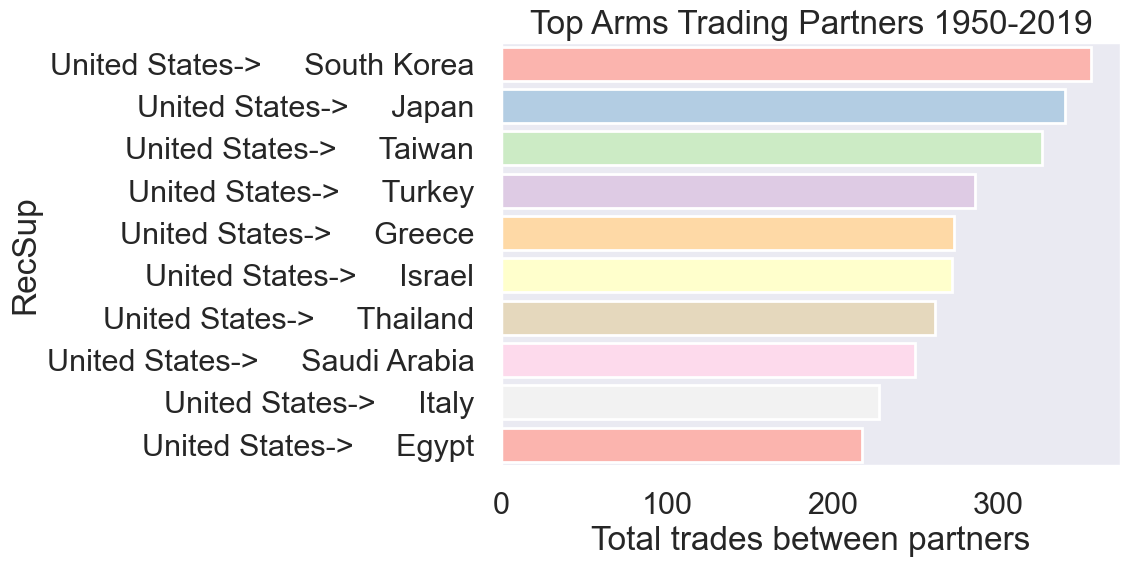

In [75]:
sns.countplot(y="RecSup", saturation=2, data=rec_sup_df, palette="Pastel1",
              order=rec_sup_df['RecSup'].value_counts().iloc[:10].index)

fig = plt.gcf()
ax = plt.gca()
ax.set_title("Top Arms Trading Partners 1950-2019")
ax.set_xlabel("Total trades between partners")
fig.savefig('C:/Users/86136/Desktop/code-Group7/NLP_Model/images/top_10_partners.png',bbox_inches='tight')

Dataframe of the US vs. all other Suppliers

In [76]:
bool_df = final_df.copy()
bool_df['Supplier'] = bool_df['Supplier'].where(bool_df['Supplier'] == "United States", "Other")

bool_df["Supplier"].value_counts()

Supplier
Other            18019
United States     8612
Name: count, dtype: int64

In [77]:
bool_df['Supplier'] = bool_df['Supplier'].replace({'United States': 1, 'Other': 0})

bool_df["Supplier"].value_counts()

C:\Users\86136\AppData\Local\Temp\ipykernel_17848\3980663679.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bool_df['Supplier'] = bool_df['Supplier'].replace({'United States': 1, 'Other': 0})


Supplier
0    18019
1     8612
Name: count, dtype: int64

In [78]:
bool_df.describe()


,Supplier
count,26631.000000
mean,0.323383
std,0.467776
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [79]:
bool_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


In [80]:
import numpy as np

# Replace 'Pending' with 0
bool_df['DeliveryYear'] = bool_df['DeliveryYear'].replace({"Pending": 0})

bool_df["DeliveryYear"] = bool_df['DeliveryYear'].astype(str).str.replace('+','').str.split('-', expand=True).astype(float).mean(axis=1)
                
bool_df.describe()


,Supplier,DeliveryYear
count,26631.000000,26631.000000
mean,0.323383,1938.860651
std,0.467776,307.743270
min,0.000000,0.000000
25%,0.000000,1971.000000
50%,0.000000,1985.500000
75%,1.000000,2004.000000
max,1.000000,2019.000000


In [81]:
bool_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011,2011.0,12,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980,1980.0,4,Second-hand; incl for MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967,1968.0,2,Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016,2016.0,3,Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979,1979.0,1,Second-hand; aid


In [82]:
non_n_ordered_rows = pd.to_numeric(bool_df['NOrdered'], errors='coerce').isnull()

non_n_ordered_rows

3        False
6        False
7        False
8        False
11       False
         ...  
27026    False
27029    False
27032    False
27033    False
27034    False
Name: NOrdered, Length: 26631, dtype: bool

In [83]:
bool_df['NOrdered'].loc[non_n_ordered_rows] = 0 

bool_df['NOrdered'].loc[non_n_ordered_rows]

C:\Users\86136\AppData\Local\Temp\ipykernel_17848\1361133076.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  bool_df['NOrdered'].loc[non_n_ordered_rows] = 0
C:\Users\86136\AppData\Local\Temp\ipykernel_17848\1361133076.py:1: SettingWithCo

1349     0
1351     0
2109     0
2804     0
2810     0
4485     0
4829     0
5224     0
6170     0
6627     0
6955     0
9578     0
9598     0
10580    0
10719    0
13271    0
13382    0
13389    0
14802    0
16516    0
17388    0
17664    0
Name: NOrdered, dtype: object

In [84]:
bool_df["NOrdered"] = pd.to_numeric(bool_df["NOrdered"])
bool_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Supplier           26631 non-null  int64  
 1   Recipient          26631 non-null  object 
 2   NOrdered           26631 non-null  int64  
 3   NoDesignation      26631 non-null  object 
 4   WeaponDescription  26631 non-null  object 
 5   OrderYear          26631 non-null  object 
 6   DeliveryYear       26631 non-null  float64
 7   NDelivered         26631 non-null  object 
 8   Comments           26631 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.0+ MB


In [85]:
bool_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011,2011.0,12,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980,1980.0,4,Second-hand; incl for MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967,1968.0,2,Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016,2016.0,3,Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979,1979.0,1,Second-hand; aid


In [86]:
non_n_deliv_rows = pd.to_numeric(bool_df['NDelivered'], errors='coerce').isnull()

bool_df['NDelivered'].loc[non_n_deliv_rows] = 0 

bool_df["NDelivered"] = pd.to_numeric(bool_df["NDelivered"])

bool_df.head()

C:\Users\86136\AppData\Local\Temp\ipykernel_17848\1822054805.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  bool_df['NDelivered'].loc[non_n_deliv_rows] = 0
C:\Users\86136\AppData\Local\Temp\ipykernel_17848\1822054805.py:3: SettingWithCo

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011,2011.0,12,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980,1980.0,4,Second-hand; incl for MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967,1968.0,2,Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016,2016.0,3,Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979,1979.0,1,Second-hand; aid


In [87]:
bool_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Supplier           26631 non-null  int64  
 1   Recipient          26631 non-null  object 
 2   NOrdered           26631 non-null  int64  
 3   NoDesignation      26631 non-null  object 
 4   WeaponDescription  26631 non-null  object 
 5   OrderYear          26631 non-null  object 
 6   DeliveryYear       26631 non-null  float64
 7   NDelivered         26631 non-null  int64  
 8   Comments           26631 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.0+ MB


In [88]:
bool_df.Comments.value_counts()

Comments
None                                                                                                                                                                                                            5035
Second-hand                                                                                                                                                                                                     2067
Second-hand; aid                                                                                                                                                                                                 598
Probably second-hand                                                                                                                                                                                             150
Aid                                                                                                                                        

Cleaning up Recipient and mostly Supplier for trailing whitespace and difficult characters for Neo4j

In [89]:
final_df['Recipient'] = final_df["Recipient"].str.replace("'", '')
final_df['Supplier'] = final_df["Supplier"].str.replace("'", '')

In [90]:
final_suppliers = final_df['Supplier'].unique()
final_suppliers

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Bosnia-Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Cambodia', 'Canada', 'Chad', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Cote dIvoire', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia', 'Denmark',
       'Dominican Republic', 'DR Congo', 'East Germany (GDR)', 'Ecuador',
       'Egypt', 'Eritrea', 'Estonia', 'Ethiopia', 'European Union**',
       'Europe multi-state', 'Fiji', 'Finland', 'FMLN (El Salvador)*',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Libya', 'Libya HoR', 'Lithuania', 'Luxembourg', 'Malawi',
       'Malaysia', 'Malta', '

In [91]:
final_recipients = final_df['Recipient'].unique()

final_recipients

array([' Burkina Faso', ' Angola', '     Nigeria', '     Western Sahara',
       ' Congo', '     Cote dIvoire', '     Guinea-Bissau',
       '     United States', ' Bolivia', '     Colombia', '     Denmark',
       '     Ecuador', '     Honduras', '     Paraguay', '     Spain',
       '     Sri Lanka', '     Uruguay', ' Sudan', ' Israel', ' India',
       '     Jordan', '     Malaysia', '     New Zealand',
       '     United Kingdom', '     Brazil', '     Brunei',
       '     Cambodia', '     Canada', '     Chad', '     Chile',
       '     Fiji', '     Ghana', '     India', '     Indonesia',
       '     Iraq', '     Jamaica', '     Japan', '     Kiribati',
       '     Kuwait', '     Laos', '     Lesotho',
       '     Marshall Islands', '     Micronesia', '     Nepal',
       '     Netherlands', '     Oman', '     Pakistan', '     Palau',
       '     Papua New Guinea', '     Philippines', '     Samoa',
       '     Singapore', '     Solomon Islands', '     Sweden',
       '     T

In [92]:
final_rs = np.concatenate([final_recipients,final_suppliers])

final_rs

array([' Burkina Faso', ' Angola', '     Nigeria', '     Western Sahara',
       ' Congo', '     Cote dIvoire', '     Guinea-Bissau',
       '     United States', ' Bolivia', '     Colombia', '     Denmark',
       '     Ecuador', '     Honduras', '     Paraguay', '     Spain',
       '     Sri Lanka', '     Uruguay', ' Sudan', ' Israel', ' India',
       '     Jordan', '     Malaysia', '     New Zealand',
       '     United Kingdom', '     Brazil', '     Brunei',
       '     Cambodia', '     Canada', '     Chad', '     Chile',
       '     Fiji', '     Ghana', '     India', '     Indonesia',
       '     Iraq', '     Jamaica', '     Japan', '     Kiribati',
       '     Kuwait', '     Laos', '     Lesotho',
       '     Marshall Islands', '     Micronesia', '     Nepal',
       '     Netherlands', '     Oman', '     Pakistan', '     Palau',
       '     Papua New Guinea', '     Philippines', '     Samoa',
       '     Singapore', '     Solomon Islands', '     Sweden',
       '     T

In [93]:
unique_rs = np.unique(final_rs)

unique_rs

array(['     ANC (South Africa)*', '     Afghanistan',
       '     African Union**', '     Albania', '     Algeria',
       '     Angola', '     Anti-Castro rebels (Cuba)*', '     Argentina',
       '     Armas (Guatemala)*', '     Armenia', '     Australia',
       '     Austria', '     Azerbaijan', '     Bahamas', '     Bahrain',
       '     Bangladesh', '     Barbados', '     Belarus', '     Belgium',
       '     Belize', '     Benin', '     Bhutan', '     Biafra',
       '     Bolivia', '     Bosnia-Herzegovina', '     Botswana',
       '     Brazil', '     Brunei', '     Bulgaria', '     Burkina Faso',
       '     Burundi', '     Cabo Verde', '     Cambodia',
       '     Cameroon', '     Canada', '     Central African Republic',
       '     Chad', '     Chile', '     China', '     Colombia',
       '     Comoros', '     Congo', '     Contras (Nicaragua)*',
       '     Costa Rica', '     Cote dIvoire', '     Croatia',
       '     Cuba', '     Cyprus', '     Czechia', '     

In [94]:
unique_rs_clean = np.char.strip(unique_rs.astype(str))

unique_rs_clean

array(['ANC (South Africa)*', 'Afghanistan', 'African Union**', 'Albania',
       'Algeria', 'Angola', 'Anti-Castro rebels (Cuba)*', 'Argentina',
       'Armas (Guatemala)*', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Biafra',
       'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Contras (Nicaragua)*',
       'Costa Rica', 'Cote dIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'DR Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'ELF (Ethiopia)*', 'EPLF (Ethiopia)*',
       'East Germany (GDR)', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'FAN (Chad)*'

In [95]:
unique_rs_clean=np.unique(unique_rs_clean)
unique_rs_clean

array(['(multiple sellers)', 'ANC (South Africa)*', 'Afghanistan',
       'African Union**', 'Albania', 'Algeria', 'Amal (Lebanon)*',
       'Angola', 'Anti-Castro rebels (Cuba)*', 'Argentina',
       'Armas (Guatemala)*', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Biafra',
       'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Contras (Nicaragua)*',
       'Costa Rica', 'Cote dIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'DR Congo', 'Darfur rebels (Sudan)*',
       'Denmark', 'Djibouti', 'Dominican Republic', 'ELF (Ethiopia)*',
       'EPLF (Ethiopia)*', 'East Germany (GDR)', 'Ecuador', 'Egypt',
       'El Salvador', 'Equ

import data into neo4j

In [98]:
# establish db connection to local db
graph = Graph(user="neo4j", password="Gyt15703908216")

graph.schema.create_uniqueness_constraint('Actor', 'name')

In [99]:
# function select all of "set" in graph obj neo4j graph
def select_star(graph_obj):
    print(graph_obj.run("MATCH (n) RETURN (n)"))

In [100]:
select_star(graph)

(No data)


In [101]:
for name in unique_rs_clean:
    safe_name = str(name)
    graph.run("CREATE (:Actor {name: $name})", name=safe_name)

In [102]:
%timeit 
for a,b,c,d,e,f,g in zip(final_df["Supplier"], final_df["Recipient"], final_df["WeaponDescription"], final_df['NoDesignation'], final_df['OrderYear'], final_df['DeliveryYear'], final_df['NDelivered']): 
    graph.run(f"MATCH (a:Actor), (b:Actor) WHERE a.name = '{a}' AND b.name = '{b}'CREATE (a)-[:supplied {{weapon_description:'{c}', designation: '{d}', order_year:'{e}',delivery_year:'{f}',num_delivered: '{g}' }}]->(b)")

In retrospect the above could've been performed on the columns I clean anyway. Womp.

In [103]:
final_df["Recipient"]=final_df["Recipient"].astype(str).str.strip()

final_df["Recipient"]

3          Burkina Faso
6                Angola
7               Nigeria
8        Western Sahara
11                Congo
              ...      
27026            Zambia
27029           Liberia
27032           Czechia
27033            Zambia
27034            Zambia
Name: Recipient, Length: 26631, dtype: object

In [104]:
final_df["Recipient"].unique()

array(['Burkina Faso', 'Angola', 'Nigeria', 'Western Sahara', 'Congo',
       'Cote dIvoire', 'Guinea-Bissau', 'United States', 'Bolivia',
       'Colombia', 'Denmark', 'Ecuador', 'Honduras', 'Paraguay', 'Spain',
       'Sri Lanka', 'Uruguay', 'Sudan', 'Israel', 'India', 'Jordan',
       'Malaysia', 'New Zealand', 'United Kingdom', 'Brazil', 'Brunei',
       'Cambodia', 'Canada', 'Chad', 'Chile', 'Fiji', 'Ghana',
       'Indonesia', 'Iraq', 'Jamaica', 'Japan', 'Kiribati', 'Kuwait',
       'Laos', 'Lesotho', 'Marshall Islands', 'Micronesia', 'Nepal',
       'Netherlands', 'Oman', 'Pakistan', 'Palau', 'Papua New Guinea',
       'Philippines', 'Samoa', 'Singapore', 'Solomon Islands', 'Sweden',
       'Thailand', 'Timor-Leste', 'Tonga', 'Trinidad and Tobago',
       'Tuvalu', 'Vanuatu', 'Yemen', 'Australia', 'Uganda', 'Argentina',
       'Belgium', 'Czechia', 'Greece', 'Portugal', 'Saudi Arabia',
       'Slovenia', 'UAE', 'Bangladesh', 'Botswana', 'Egypt', 'France',
       'Gabon', 'German

In [105]:
final_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


In [106]:
len(final_df)

26631

NLP Exploration of Comments

T-sne and UMAP on text off Comments: need to clean up previous bool_df

In [107]:
bool_df = final_df.copy()

#eventual y / target
bool_df['Supplier'] = bool_df['Supplier'].where(bool_df['Supplier'] == "United States", "Other")
bool_df['Supplier'] = bool_df['Supplier'].replace({'United States': 1, 'Other': 0})

#commenting out for now as valuable info to not reduce to boolean
# bool_df['Recipient'] = bool_df['Recipient'].where(bool_df['Recipient'] == "United States", "Other")
# bool_df['Recipient']=bool_df.replace({'Recipient' : { 'United States' : 1, 'Other' : 0}})

bool_df['Supplier'].value_counts()

C:\Users\86136\AppData\Local\Temp\ipykernel_17848\2784402204.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bool_df['Supplier'] = bool_df['Supplier'].replace({'United States': 1, 'Other': 0})


Supplier
0    18019
1     8612
Name: count, dtype: int64

In [108]:
import nltk
import unicodedata
import re
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\86136\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [109]:
stop = stopwords.words('english')

In [110]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
#   stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stop]

In [111]:
clean_comments = bool_df['Comments'] = bool_df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

words = basic_clean(''.join(str(clean_comments.tolist())))

words


['probably',
 'secondhand',
 'secondhand',
 'incl',
 'mp',
 'secondhand',
 'secondhand',
 'aid',
 'secondhand',
 'aid',
 'secondhand',
 'use',
 'fight',
 'rebel',
 'secondhand',
 'use',
 'rebel',
 'secondhand',
 'status',
 'uncertain',
 'secondhand',
 'delivered',
 '1980s',
 'aid',
 'unita',
 'bought',
 'back',
 'peace',
 'agreement',
 'angola',
 'secondhand',
 'aid',
 'm5',
 'm9',
 'version',
 'secondhand',
 'aid',
 'antinarcotics',
 'operation',
 'secondhand',
 '35',
 'deal',
 'secondhand',
 'spare',
 'lynx',
 'helicopter',
 'secondhand',
 'modernized',
 'delivery',
 'part',
 'illegal',
 '34',
 'deal',
 'none',
 'secondhand',
 '07',
 'deal',
 'cv440',
 'version',
 'secondhand',
 'secondhand',
 'aid',
 'secondhand',
 'aid',
 'exargentinian',
 'modernized',
 'delivery',
 'secondhand',
 'aid',
 'secondhand',
 'aid',
 'secondhand',
 'secondhand',
 'secondhand',
 'aid',
 'm9',
 'version',
 'secondhand',
 '11',
 'deal',
 'produced',
 '1980s',
 'speculation',
 'export',
 'sold',
 'sri',
 'l

In [112]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(none, none)                1659
(secondhand, secondhand)    1201
(secondhand, aid)           1028
(combat, aircraft)          1018
(version, secondhand)        936
(none, secondhand)           860
(version, none)              751
(aid, secondhand)            737
(version, incl)              591
(deal, incl)                 508
Name: count, dtype: int64

In [113]:
bool_df.insert(len(bool_df.columns)-1, 'Secondhand', 0)

bool_df['Secondhand'] = bool_df['Comments'].str.lower().str.contains("second-hand")

bool_df['Secondhand'] = bool_df['Secondhand'].fillna(0)

bool_df['Secondhand'].value_counts(dropna=False)


Secondhand
False    19487
True      7144
Name: count, dtype: int64

In [114]:
'''bool_df.insert(len(bool_df.columns)-1,'Secondhand',0)

bool_df['Secondhand'] = bool_df[bool_df['Comments'].str.lower().str.contains("second-hand")]

bool_df['Secondhand']'''



'bool_df.insert(len(bool_df.columns)-1,\'Secondhand\',0)\n\nbool_df[\'Secondhand\'] = bool_df[bool_df[\'Comments\'].str.lower().str.contains("second-hand")]\n\nbool_df[\'Secondhand\']'

In [115]:
# bool_df['Secondhand'].value_counts(dropna=False)

In [116]:
'''bool_df['Secondhand'] = bool_df['Secondhand'].fillna(0)

bool_df['Secondhand'].value_counts(dropna=False)'''

"bool_df['Secondhand'] = bool_df['Secondhand'].fillna(0)\n\nbool_df['Secondhand'].value_counts(dropna=False)"

In [117]:
bool_df.insert(len(bool_df.columns)-1, 'Aid', 0)

bool_df.loc[bool_df['Comments'].str.lower().str.contains("aid"), 'Aid'] = 1

bool_df['Aid'] = bool_df['Aid'].fillna(0)

bool_df['Aid'].value_counts(dropna=False)



Aid
0    24233
1     2398
Name: count, dtype: int64

In [118]:
searchfor = ['combat', 'aircraft']

bool_df.insert(len(bool_df.columns) - 1, 'CombatAircraft', 0)

bool_df.loc[bool_df['Comments'].str.lower().str.contains("combat|aircraft"), 'CombatAircraft'] = 1

bool_df['CombatAircraft'] = bool_df['CombatAircraft'].fillna(0)

bool_df['CombatAircraft'].value_counts(dropna=False)



CombatAircraft
0    24399
1     2232
Name: count, dtype: int64

Comments T-SNE with y of Supplier

c:\Users\86136\anaconda3\envs\db_project\lib\site-packages\yellowbrick\text\tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


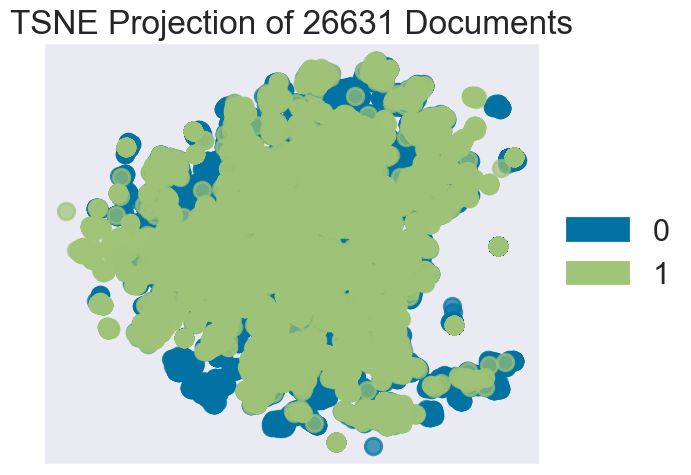

<Axes: title={'center': 'TSNE Projection of 26631 Documents'}>

In [119]:
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(clean_comments)
y = bool_df['Supplier']

tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

UMAP version of above

c:\Users\86136\anaconda3\envs\db_project\lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
c:\Users\86136\anaconda3\envs\db_project\lib\site-packages\yellowbrick\text\umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


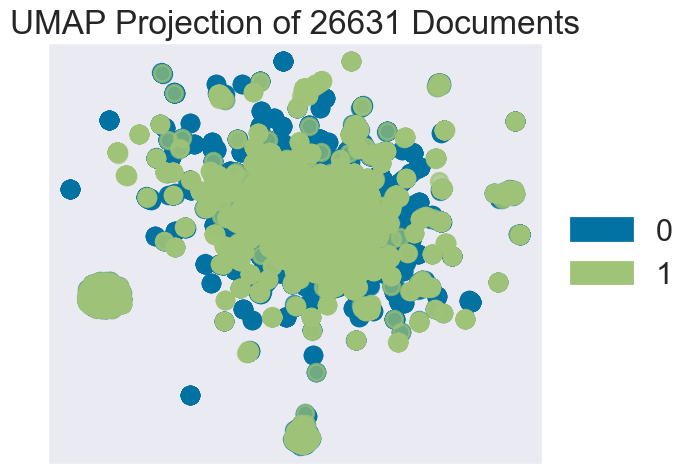

<Axes: title={'center': 'UMAP Projection of 26631 Documents'}>

In [120]:
umap = UMAPVisualizer()
umap.fit(X,y)
umap.show()

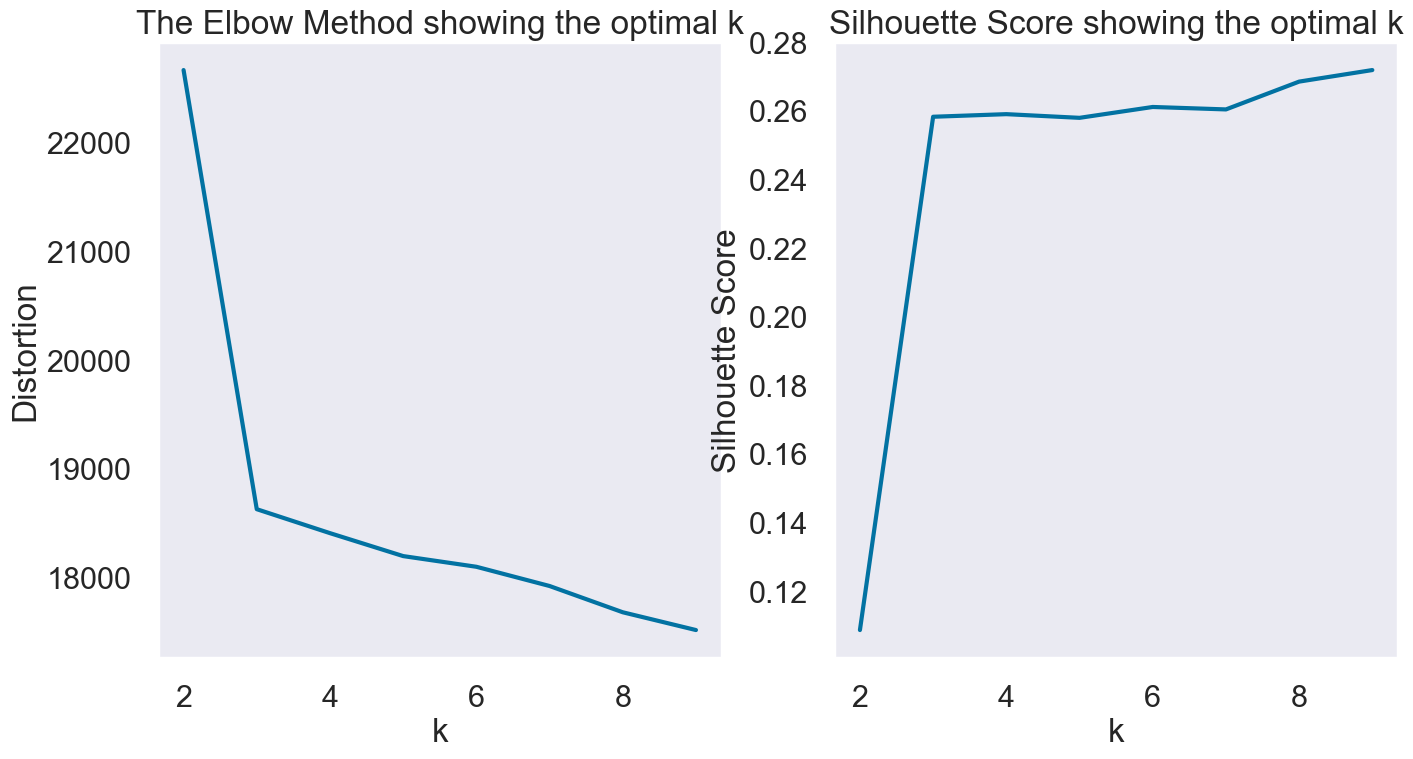

Optimal number of clusters: 9


In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import UMAPVisualizer
from umap import UMAP

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(final_df['Comments'])

# 选择最佳的聚类数量
distortions = []
silhouettes = []
K = range(2, 10)  # 选择从2到10的聚类数量进行测试
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    labels = kmeanModel.fit_predict(X)
    distortions.append(kmeanModel.inertia_)
    silhouette_avg = silhouette_score(X, labels)
    silhouettes.append(silhouette_avg)

# 使用肘部方法和轮廓系数来确定最佳的聚类数k
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.subplot(1, 2, 2)
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score showing the optimal k')
plt.show()

# 确定最佳k值
optimal_k = silhouettes.index(max(silhouettes)) + 2
print('Optimal number of clusters:', optimal_k)

c:\Users\86136\anaconda3\envs\db_project\lib\site-packages\yellowbrick\text\umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


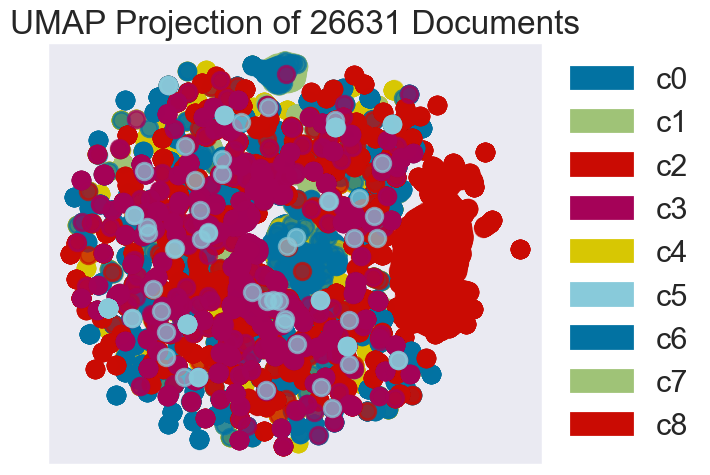

Cluster 0: version, incl, hand, second, deal, for, aid, and, bell, mk
Cluster 1: before, modernized, delivery, but, second, hand, to, probably, deal, aid
Cluster 2: none, zwl, antilles, aoe, anzone, anzac, anza, antonio, antioquia, anti
Cluster 3: deal, of, part, incl, for, launchers, in, version, production, components
Cluster 4: designation, hand, second, uncertain, for, use, to, aid, with, in
Cluster 5: 13, meteor, version, incl, trainer, sabre, deal, 21f, cl, for
Cluster 6: second, hand, probably, possibly, deal, incl, version, annapolis, anshan, antarctic
Cluster 7: aid, second, hand, map, mdap, probably, possibly, version, 113a2, for
Cluster 8: for, aircraft, from, combat, in, produced, frigates, and, fac, version


In [122]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering
from umap import UMAP

# 选择一个聚类算法进行聚类
clusters = KMeans(n_clusters=optimal_k, random_state=42)
clusters.fit(X)

# 使用UMAP进行降维以便可视化
umap_model = UMAP()
umap_out = umap_model.fit_transform(X)

# 可视化聚类结果
umap_vis = UMAPVisualizer()
umap_vis.fit(umap_out, ["c{}".format(c) for c in clusters.labels_])
umap_vis.show()

# 打印每个聚类的中心词汇
tfidf_words = tfidf.get_feature_names_out()
common_words = clusters.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(f'Cluster {num}: ' + ', '.join(tfidf_words[word] for word in centroid))


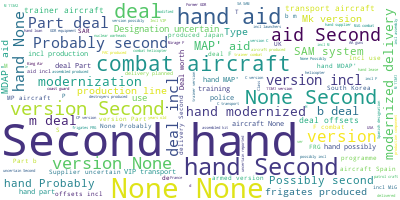

In [123]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(clean_comments.to_string())

wordcloud.to_image()

In [124]:
bool_df.head(10)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Secondhand,Aid,CombatAircraft,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,True,0,0,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,True,0,0,Second-hand; incl MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,True,0,0,Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016,2016,3,True,1,0,Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979,1979,1,True,1,0,Second-hand; aid
12,0,Cote dIvoire,2,BMP-2,IFV,2002,2002,2,True,0,0,Second-hand; use fight rebels
13,0,Cote dIvoire,2,T-55,Tank,2002,2002,2,True,0,0,Second-hand; use rebels
14,0,Guinea-Bissau,1,Do-27,Light aircraft,1980,1980,1,True,0,0,Second-hand; status uncertain
15,0,United States,250,FIM-92 Stinger,Portable SAM,1992,1992,250,True,1,0,Second-hand; delivered 1980s aid UNITA bought ...
18,0,Bolivia,37,M-3/M-5 Half-track,APC,2006,2006,37,True,1,0,Second-hand; aid; M-5 M-9 versions


In [125]:
bool_df['WeaponDescription'].nunique()

257

In [126]:
bool_df.insert(len(bool_df.columns)-1,'page_rank_r',0)

bool_df.columns

Index(['Supplier', 'Recipient', 'NOrdered', 'NoDesignation',
       'WeaponDescription', 'OrderYear', 'DeliveryYear', 'NDelivered',
       'Secondhand', 'Aid', 'CombatAircraft', 'page_rank_r', 'Comments'],
      dtype='object')

In [127]:
modeling_df = bool_df.copy()

modeling_df = modeling_df.drop(["Comments", "NOrdered", "NDelivered"], axis=1)

modeling_df.head()

,Supplier,Recipient,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,Secondhand,Aid,CombatAircraft,page_rank_r
3,0,Burkina Faso,M-43 120mm,Mortar,2011,2011,True,0,0,0
6,0,Angola,N-262 Fregate,Transport aircraft,1980,1980,True,0,0,0
7,0,Nigeria,Il-28,Bomber aircraft,1967,1968,True,0,0,0
8,0,Western Sahara,BTR-60PB,APC,2016,2016,True,1,0,0
11,0,Congo,Noratlas,Transport aircraft,1979,1979,True,1,0,0


model

In [128]:
modeling_df.to_csv('modeling_df.csv', index=False)

In [129]:
X = modeling_df.drop("Supplier",axis=1)
y = modeling_df['Supplier'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,
                                                    stratify=y)

X_train.shape, X_test.shape

((18641, 9), (7990, 9))

Compare performances with scaling encoded features

Test-train split

In [130]:
from sklearn.model_selection import train_test_split, cross_val_score
import time

def n_feature_compare(n_feature,X,y):
    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    
    ohe_enc = OneHotEncoder(
        top_categories=n_feature,
        variables=['Recipient','NoDesignation',"WeaponDescription",'OrderYear','DeliveryYear'],
        drop_last=False
    )
    ohe_enc.fit(X_train)
    X_train = ohe_enc.transform(X_train)
    X_test = ohe_enc.transform(X_test)

    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
    
    clf = MultinomialNB()

    scores = cross_val_score(clf, X_train_res, y_train_res, cv=5, scoring="f1_weighted")
    print("F1 weighted: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print(f"Scores: {scores}")
    
    elapsed_time = time.time() - start
    print(f"Time elapsed: {elapsed_time} for {n_feature} features")
    print(f"For {n_feature} features")

# n_feature=10
# n_feature_compare(n_feature, X, y)


In [131]:
# Compare the effects of different quantitative features on model performance
# Finally choose 1000
'''feature_amounts = [10,15,20,25,50,100, 200,500,1000, 2000, 3000]

for amount in feature_amounts:
    n_feature_compare(amount,X,y)'''

'feature_amounts = [10,15,20,25,50,100, 200,500,1000, 2000, 3000]\n\nfor amount in feature_amounts:\n    n_feature_compare(amount,X,y)'

In [132]:
from sklearn.naive_bayes import ComplementNB
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,
                                                    stratify=y)

In [133]:
from imblearn.over_sampling import SMOTE

ohe_enc = OneHotEncoder(
top_categories=1000,variables=['Recipient','NoDesignation',"WeaponDescription",'OrderYear','DeliveryYear'],
    drop_last=False)

ohe_enc.fit(X_train)

X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


C:\Users\86136\AppData\Local\Temp\ipykernel_17848\2073819846.py:13: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


In [134]:
clf = ComplementNB()
scores = cross_val_score(clf, X_train_res, y_train_res, cv=5, scoring="f1_weighted")
print("F1weighted: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

F1weighted: 0.88 (+/- 0.04)
[0.90325896 0.90343345 0.87809075 0.85906506 0.87174674]


In [135]:
from sklearn.model_selection import GridSearchCV
parameters = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}  
grid_search= GridSearchCV(clf, parameters)
grid_search.fit(X_train_res, y_train_res)
print("Best parameters found:", grid_search.best_params_)
print("Best estimator found:", grid_search.best_estimator_)


Best parameters found: {'alpha': 0.1}
Best estimator found: ComplementNB(alpha=0.1)


In [136]:
y_pred = grid_search.predict(X_test)
    
f1_score(y_test,y_pred,average='weighted')

0.8951343724778466

In [137]:
grid_search.best_params_

{'alpha': 0.1}

In [138]:
clf = ComplementNB(alpha=0.1)
clf.fit(X_train_res,y_train_res)

ComplementNB(alpha=0.1)

In [139]:
len(X_test)

7990

In [140]:
import shap

shap.initjs()

In [141]:
# print("X_train_res shape:", X_train_res.shape)
# print("Number of coefficients in the model:", len(linear_model.coef_))


Up to 1000 dummy variables per feature, brought down via. PCA

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,
                                                    stratify=y)

Examination of rare categories

In [143]:
def find_non_rare_labels(df, variable, tolerance):
    
    temp = df.groupby([variable])[variable].count() / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [144]:
modeling_df['Recipient'].nunique()

260

In [145]:
print(len(find_non_rare_labels(modeling_df,'Recipient',0.01)))
print(modeling_df['Recipient'].nunique())

37
260


In [146]:
print(find_non_rare_labels(modeling_df,'NoDesignation',0.01))
print(modeling_df['NoDesignation'].nunique())

[]
3966


In [147]:
print(len(find_non_rare_labels(modeling_df,'OrderYear',0.01)))
print(modeling_df['DeliveryYear'].nunique())

63
877


In [148]:
# from feature_engine.categorical_encoders import RareLabelCategoricalEncoder

In [149]:
# # Rare value encoder from Soledad Gali -- actually brings down performance due to such sparse data
# rare_encoder = RareLabelCategoricalEncoder(
#     tol=0.01,  # minimal percentage to be considered non-rare
#     n_categories=4, # minimal number of categories the variable should have to re-cgroup rare categories
#     variables=['Recipient','NoDesignation',"WeaponDescription",'OrderYear','DeliveryYear'] # variables to re-group
# )  

In [150]:
# rare_encoder.fit(X_train.fillna('Missing'))

In [151]:
# # the encoder_dict_ is a dictionary of variable: frequent labels pair
# rare_encoder.encoder_dict_

In [152]:
# X_train = rare_encoder.transform(X_train.fillna('Missing'))
# X_test = rare_encoder.transform(X_test.fillna('Missing'))

In [153]:
ohe_enc = OneHotEncoder(
    top_categories=1000,variables=['Recipient','NoDesignation',"WeaponDescription",'OrderYear','DeliveryYear'],
    drop_last=False)

ohe_enc.fit(X_train)
    
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

In [154]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [155]:
from sklearn.decomposition import PCA

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [156]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

C:\Users\86136\AppData\Local\Temp\ipykernel_17848\1154429232.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train, y_train = sm.fit_resample(X_train, y_train.ravel())


In [157]:
from sklearn.preprocessing import MinMaxScaler 
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [158]:
# erroring out for some reason 

# clf = ComplementNB()

# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)
    
# f1_score(y_test,y_pred,average='weighted')

In [159]:
dummy_df = pd.get_dummies(modeling_df, columns=['Recipient','NoDesignation',"WeaponDescription",'OrderYear','DeliveryYear'],
                          drop_first=True)
cols = dummy_df.drop("Supplier",axis=1)

cols.columns

Index(['Secondhand', 'Aid', 'CombatAircraft', 'page_rank_r',
       'Recipient_Afghanistan', 'Recipient_African Union**',
       'Recipient_Albania', 'Recipient_Algeria', 'Recipient_Amal (Lebanon)*',
       'Recipient_Angola',
       ...
       'DeliveryYear_2016-2017', 'DeliveryYear_2016-2018',
       'DeliveryYear_2016-2019', 'DeliveryYear_2017', 'DeliveryYear_2017-2018',
       'DeliveryYear_2017-2019', 'DeliveryYear_2018', 'DeliveryYear_2018-2019',
       'DeliveryYear_2019', 'DeliveryYear_Pending'],
      dtype='object', length=5436)

In [160]:
import catboost
from catboost import CatBoostClassifier

In [161]:
bool_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Secondhand,Aid,CombatAircraft,page_rank_r,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,True,0,0,0,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,True,0,0,0,Second-hand; incl MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,True,0,0,0,Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016,2016,3,True,1,0,0,Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979,1979,1,True,1,0,0,Second-hand; aid


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,
                                                    stratify=y)

In [163]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18641 entries, 7476 to 14422
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Recipient          18641 non-null  object
 1   NoDesignation      18641 non-null  object
 2   WeaponDescription  18641 non-null  object
 3   OrderYear          18641 non-null  object
 4   DeliveryYear       18641 non-null  object
 5   Secondhand         18641 non-null  bool  
 6   Aid                18641 non-null  int64 
 7   CombatAircraft     18641 non-null  int64 
 8   page_rank_r        18641 non-null  int64 
dtypes: bool(1), int64(3), object(5)
memory usage: 1.3+ MB


In [164]:
# model_cb = CatBoostClassifier(cat_features=['Recipient','NoDesignation','WeaponDescription','OrderYear',"DeliveryYear"],
#                              n_estimators = 100, max_depth = 4, learning_rate= 0.1, random_state=69)
# model_cb.fit(X_train, y_train, verbose=50,plot=True, eval_set=(X_test, y_test))
from catboost import Pool, CatBoostClassifier

feature_names = X_train.columns.tolist()

train_pool = Pool(data=X_train.values, label=y_train, cat_features=['Recipient','NoDesignation','WeaponDescription','OrderYear',"DeliveryYear"], feature_names=feature_names)
test_pool = Pool(data=X_test.values, label=y_test, cat_features=['Recipient','NoDesignation','WeaponDescription','OrderYear',"DeliveryYear"], feature_names=feature_names)

model_cb = CatBoostClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=69)
model_cb.fit(train_pool, verbose=50, eval_set=test_pool)




0:	learn: 0.6244377	test: 0.6179591	best: 0.6179591 (0)	total: 211ms	remaining: 20.9s
50:	learn: 0.1929896	test: 0.1504166	best: 0.1504166 (50)	total: 2.9s	remaining: 2.79s
99:	learn: 0.1847976	test: 0.1450686	best: 0.1450686 (99)	total: 5.25s	remaining: 0us

bestTest = 0.1450685989
bestIteration = 99



In [165]:
model_cb.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [166]:
model_cb.best_score_

{'learn': {'Logloss': 0.18479758713339023},
 'validation': {'Logloss': 0.14506859890699303}}

In [167]:
model_cb.score(X_train, y_train)

0.9672764336677216